In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('listings[1].csv')

# Check the first few rows
print(df.head())

# Check the structure and missing data
print(df.info())
print(df.describe())


      id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20250302144653   2025-03-03   
1  27886  https://www.airbnb.com/rooms/27886  20250302144653   2025-03-03   
2  28871  https://www.airbnb.com/rooms/28871  20250302144653   2025-03-03   
3  29051  https://www.airbnb.com/rooms/29051  20250302144653   2025-03-03   
4  44391  https://www.airbnb.com/rooms/44391  20250302144653   2025-03-03   

            source                                               name  \
0      city scrape          Quiet Garden View Room & Super Fast Wi-Fi   
1  previous scrape  Romantic, stylish B&B houseboat in canal district   
2      city scrape                            Comfortable double room   
3      city scrape                            Comfortable single room   
4  previous scrape    Quiet 2-bedroom Amsterdam city centre apartment   

                                         description  \
0          Quiet Garden View Room & Super 

In [ ]:
columns_to_drop = [
    'listing_url', 'scrape_id', 'last_scraped', 'description', 'neighborhood_overview',
    'picture_url', 'host_url', 'host_name', 'host_location', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications',
    'license', 'calendar_last_scraped', 'first_review', 'last_review'
]

df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [ ]:
monetary_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']
for col in monetary_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df_cleaned = df_cleaned.dropna(axis=1, thresh=int(0.5 * len(df_cleaned)))
df_cleaned = df_cleaned[df_cleaned['price'].notnull() & (df_cleaned['price'] > 0)]


In [ ]:
df_cleaned = df_cleaned.drop_duplicates()


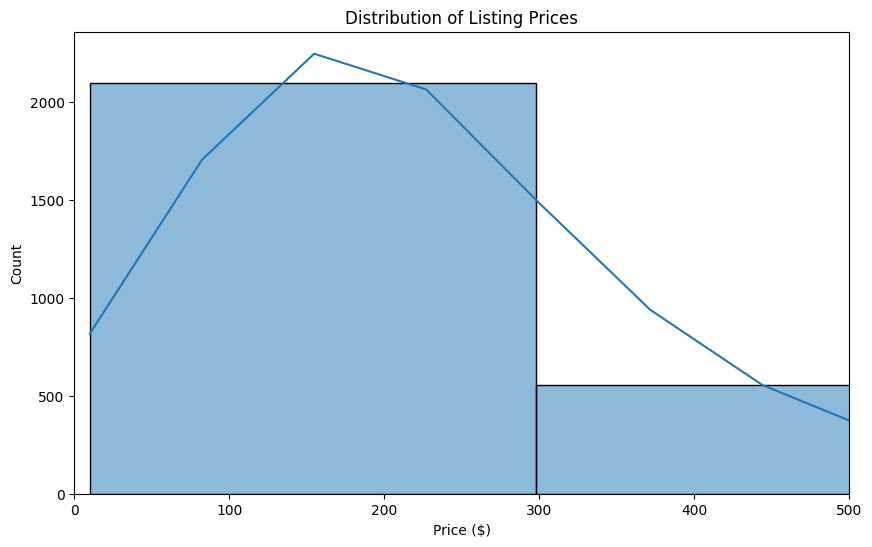

In [ ]:
#distribution of price
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.xlim(0, 500)  # Optional: Limit to $500 for better view
plt.show()


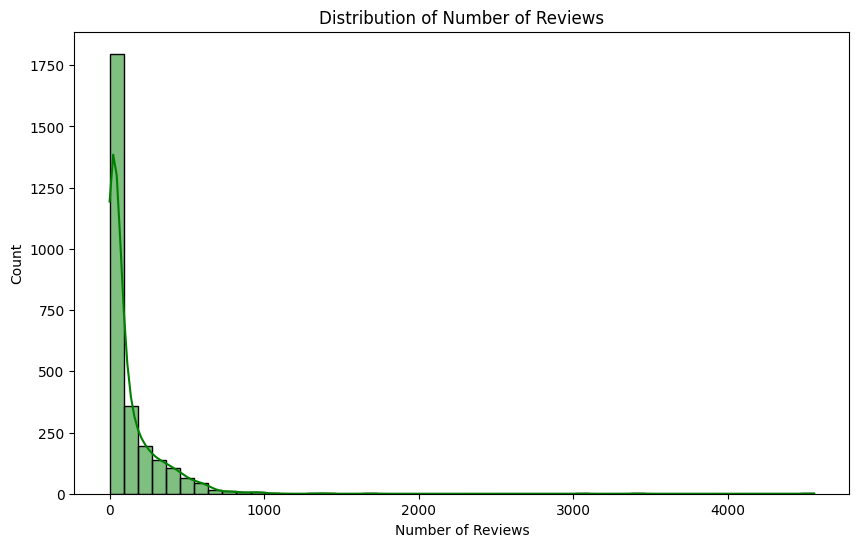

In [ ]:
#Distribution of number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['number_of_reviews'], bins=50, kde=True, color='green')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()


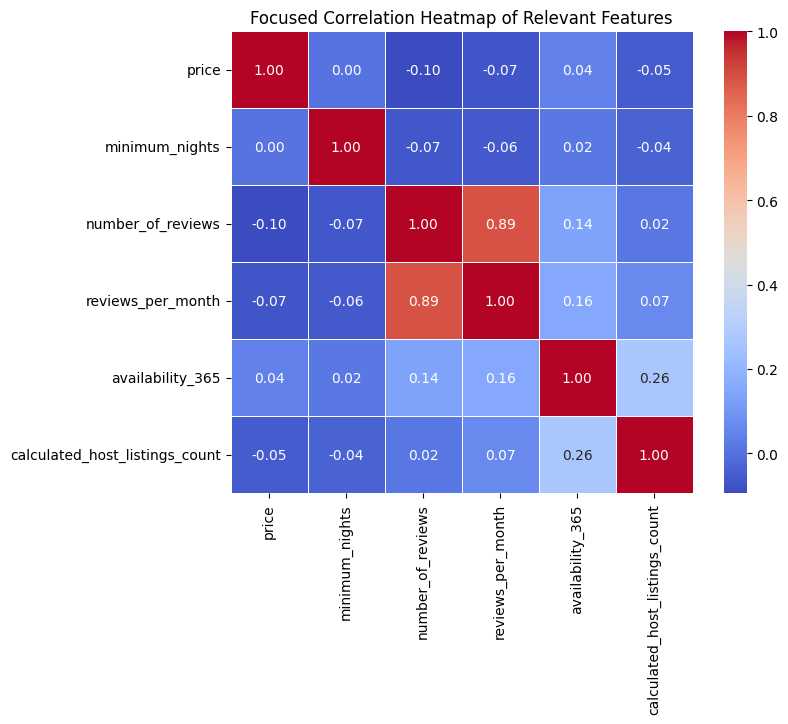

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns only (ensure they exist in your cleaned data)
relevant_columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'availability_365',
    'calculated_host_listings_count'
]

# Filter the dataframe
df_relevant = df_cleaned[relevant_columns]

# Calculate correlation
corr = df_relevant.corr()

# Plot clean heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Focused Correlation Heatmap of Relevant Features')
plt.show()


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Define center of the map
map_center = [df_cleaned['latitude'].mean(), df_cleaned['longitude'].mean()]
hotel_map = folium.Map(location=map_center, zoom_start=12)

# Use marker cluster to group nearby listings
marker_cluster = MarkerCluster().add_to(hotel_map)

# Add markers to the map
for _, row in df_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Name: {row['name']}<br>Price: ${row['price']}<br>Room Type: {row['room_type']}",
    ).add_to(marker_cluster)

# Save map as an HTML file
hotel_map.save('hotel_listings_map.html')
print("Interactive Map saved as 'hotel_listings_map.html'")


Interactive Map saved as 'hotel_listings_map.html'


In [ ]:
#✅ Business-Driven Analysis Questions
#1. What is the average price of listings?
avg_price = df_cleaned['price'].mean()
print(f"Average Listing Price: ${avg_price:.2f}")



Average Listing Price: $247.95


In [ ]:
room_type_counts = df_cleaned['room_type'].value_counts()
print("Most Common Room Types:\n", room_type_counts)


Most Common Room Types:
 room_type
Entire home/apt    1745
Private room        971
Hotel room           27
Shared room           7
Name: count, dtype: int64


In [ ]:
neighborhood_counts = df_cleaned['neighbourhood_cleansed'].value_counts().head(10)
print("Top 10 Neighborhoods with most listings:\n", neighborhood_counts)


Top 10 Neighborhoods with most listings:
 neighbourhood_cleansed
Centrum-West                              445
De Baarsjes - Oud-West                    417
Centrum-Oost                              340
De Pijp - Rivierenbuurt                   257
Westerpark                                186
Zuid                                      174
Oud-Noord                                 131
Oud-Oost                                  124
Bos en Lommer                              92
Oostelijk Havengebied - Indische Buurt     80
Name: count, dtype: int64


In [ ]:
top_expensive = df_cleaned.sort_values('price', ascending=False).head(5)
top_expensive[['name', 'neighbourhood_cleansed', 'price', 'room_type']]


,name,neighbourhood_cleansed,price,room_type
2171,Amazing Spacious Canal Apartment in Centre,Centrum-Oost,14404.0,Entire home/apt
4166,★★★★ CANAL APARTMENT | AMSTERDAM CENTRAL | 4P ...,Centrum-Oost,10000.0,Private room
429,pay a little more get a lot more,Centrum-West,10000.0,Entire home/apt
3933,Appartement centrum Amsterdam,Zuid,5135.0,Entire home/apt
5115,Enjoy ShipStays Hotel in Amsterdam!,Oud-Noord,2600.0,Entire home/apt


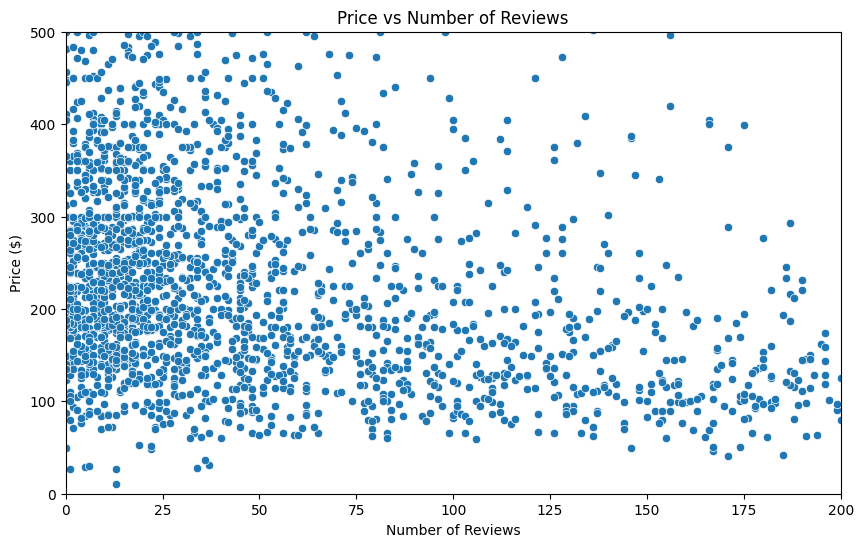

In [ ]:
#Is there a relationship between price and number of reviews?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='number_of_reviews', y='price')
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.xlim(0, 200)  # Optional: Focus on properties with up to 200 reviews
plt.ylim(0, 500)  # Optional: Focus on prices up to $500
plt.show()


In [ ]:
avg_availability = df_cleaned['availability_365'].mean()
print(f"Average Availability (days per year): {avg_availability:.0f} days")


Average Availability (days per year): 133 days


In [ ]:
low_reviews_high_price = df_cleaned[
    (df_cleaned['number_of_reviews'] <= 5) & (df_cleaned['price'] > 300)
]
low_reviews_high_price[['name', 'neighbourhood_cleansed', 'price', 'number_of_reviews']].head(5)


,name,neighbourhood_cleansed,price,number_of_reviews
389,Cosy appartment near vondelpark.,Zuid,411.0,0.0
442,Family Home in Amsterdam Zuid,Zuid,1650.0,2.0
447,"Ideal : Close center, Museums in Residential Area",Zuid,1000.0,1.0
509,Spacious & modern family house in Amsterdam,Slotervaart,360.0,4.0
590,New & specious house in Amsterdam (Metro Noord),Noord-Oost,333.0,0.0


In [ ]:
avg_price_per_neighborhood = df_cleaned.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)
print("Top 10 Expensive Neighborhoods:\n", avg_price_per_neighborhood)


Top 10 Expensive Neighborhoods:
 neighbourhood_cleansed
Centrum-Oost                321.641176
Zuid                        303.948276
Oud-Noord                   275.954198
Centrum-West                272.734831
De Pijp - Rivierenbuurt     260.023346
IJburg - Zeeburgereiland    244.354430
De Baarsjes - Oud-West      235.705036
Westerpark                  224.688172
Watergraafsmeer             219.441176
Oud-Oost                    201.225806
Name: price, dtype: float64


Visual Insights to Support Business Strategy


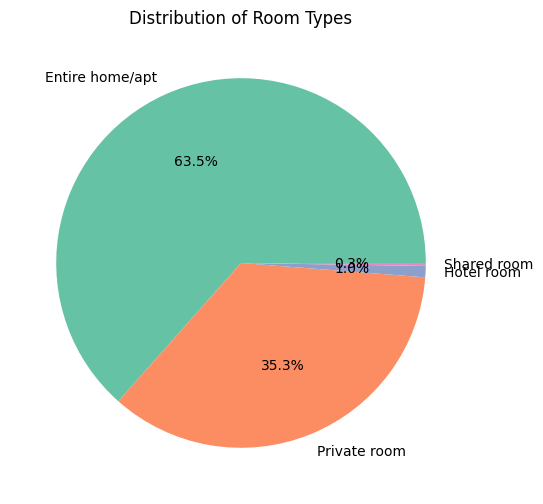

In [ ]:
plt.figure(figsize=(8, 6))
df_cleaned['room_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Room Types')
plt.ylabel('')
plt.show()


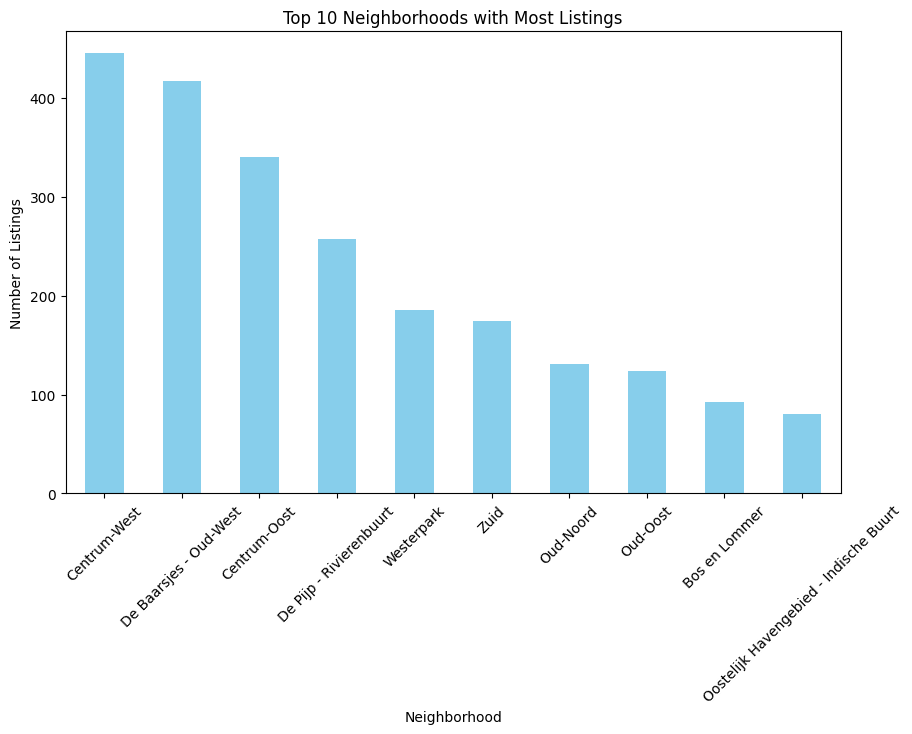

In [ ]:
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with Most Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()
